# 배깅

In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons # 사이킷런의 데이터 불러오기

X,y = make_moons(n_samples=100,noise=0.25, random_state=3) # X는 데이터, y는 라벨
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,   
                                                random_state=42)   
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,
                           max_samples=5,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train) # 
y_pred = bag_clf.predict(X_test) # 모델이 입력변수에 대한 라벨 반환

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_y_pred = dt_clf.predict(X_test)


In [202]:
X

array([[ 1.87756309,  0.56839425],
       [ 0.36877983, -0.34894509],
       [ 0.96515318,  0.10921819],
       [ 0.48599685,  0.20291313],
       [ 1.72532644,  0.53367598],
       [ 1.47976586,  0.08726406],
       [ 2.11889248,  0.60498388],
       [-0.74017805,  0.49615542],
       [-0.38099245,  1.34740194],
       [ 0.22944941,  0.87981305],
       [ 1.31311917, -0.69665985],
       [ 0.87435391,  0.83750547],
       [ 0.77145295, -0.69709227],
       [ 1.26285558,  0.12916271],
       [-0.71988634,  0.69106791],
       [ 0.79205253, -0.40516241],
       [ 1.31886119, -0.41396289],
       [ 0.26579093,  0.78151982],
       [ 0.08686038,  0.49400243],
       [-0.74872343, -0.06972957],
       [ 0.88404174, -0.35425773],
       [ 1.02671711,  0.73292915],
       [ 0.73867317,  0.30808589],
       [ 1.12856036,  0.33191968],
       [ 1.15536561, -0.50593577],
       [ 1.56825139, -0.05911358],
       [ 0.29004812,  1.00820293],
       [ 0.64076308, -0.19860992],
       [-1.20034998,

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [194]:
len(y_pred)

25

In [47]:
dt_y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [48]:
a=(y_pred==dt_y_pred)

In [49]:
a=(y_pred==dt_y_pred)
b=0
for i in a:
    if i==False:
        b+=1
print(b)

9


In [63]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,
                           bootstrap=True,n_jobs=-1,oob_score=True)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\envs\jy3.6\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.8666666666666667

In [65]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

In [197]:
??accuracy_score

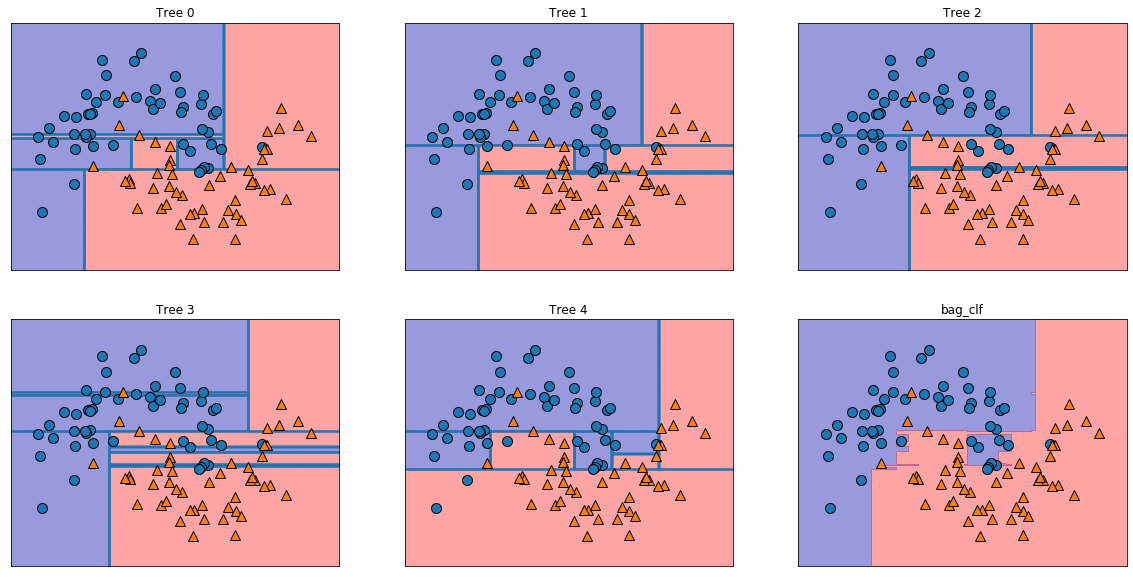

In [64]:
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),bag_clf.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y, tree, ax=ax)
mglearn.plots.plot_2d_separator(bag_clf,X,fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("bag_clf")
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

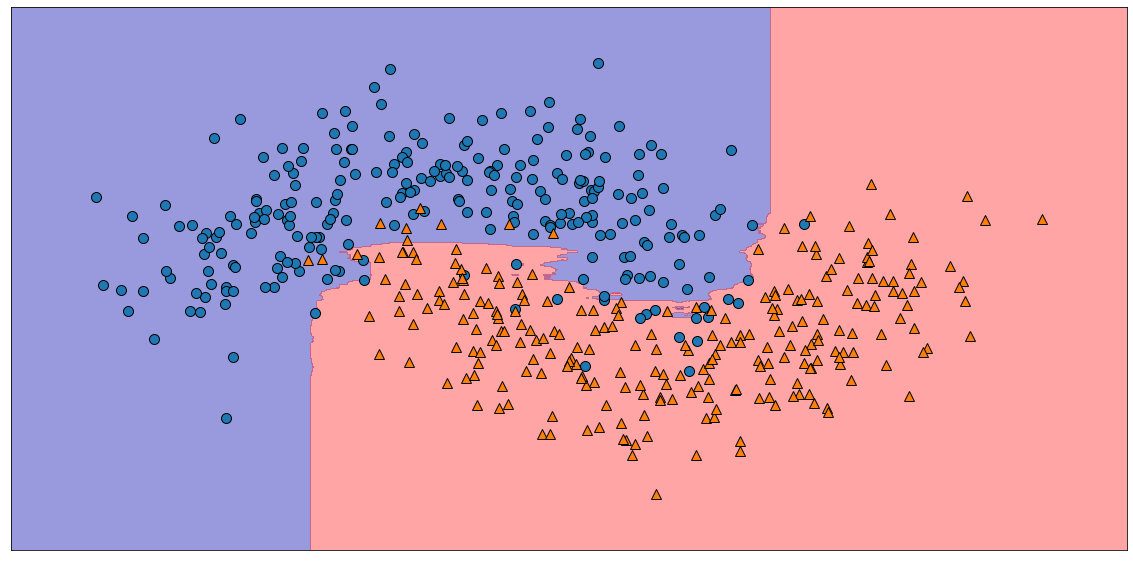

In [93]:
# 500개 dt 반복한 그래프
X1,y1 = make_moons(n_samples=500,noise=0.25, random_state=3)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,stratify=y1, 
                                                random_state=45)
bag_clf1 = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                           max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf1.fit(X1_train,y1_train)
y1_pred = bag_clf1.predict(X1_test)

fig= plt.subplots(figsize=(20,10))

mglearn.plots.plot_2d_separator(bag_clf1,X1,fill=True, alpha=0.4)

mglearn.discrete_scatter(X1[:,0],X1[:,1],y1)
plt.show()

In [91]:
X1,y1 = make_moons(n_samples=500,noise=0.25, random_state=3)
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,stratify=y1, 
                                                random_state=43)

# 랜덤포레스트

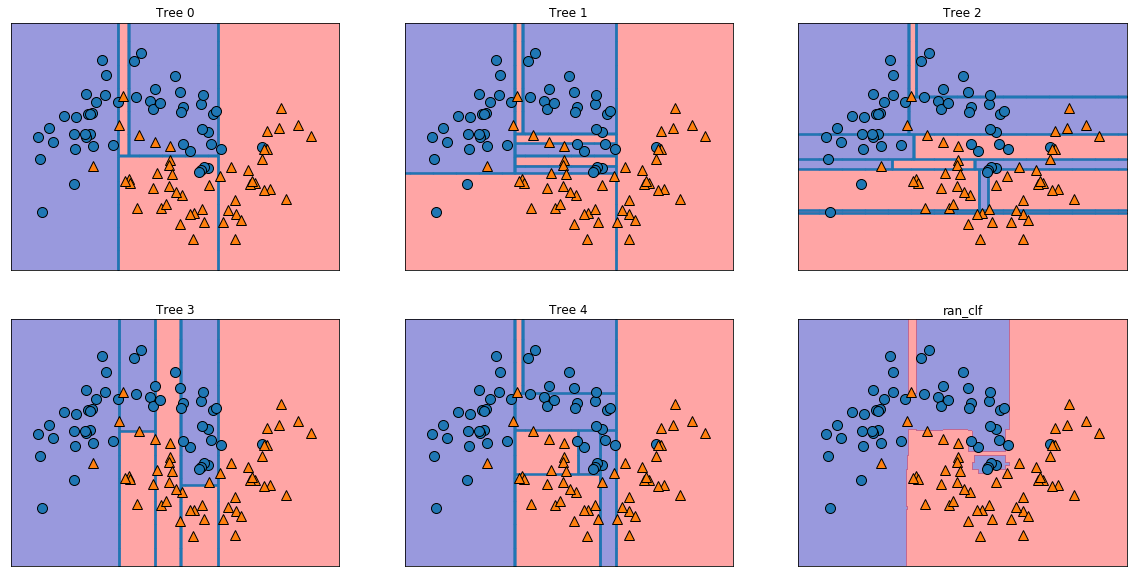

In [188]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import mglearn

X,y = make_moons(n_samples=100,noise=0.25, random_state=3)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, 
                                                random_state=42)
ran_clf = RandomForestClassifier(n_estimators=5, max_features=1) 
                                # 인수로 DT 함수 안 넣음, 속성이 2개라서 max_features 1로 해도 같다.
ran_clf.fit(X_train,y_train)
y_pred = ran_clf.predict(X_test)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_y_pred = dt_clf.predict(X_test)


fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),ran_clf.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y, tree, ax=ax)
mglearn.plots.plot_2d_separator(ran_clf,X,fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("ran_clf")
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

In [104]:
ran_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
# 속성 중요도 표시
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1,random_state=42)
rnd_clf.fit(iris["data"],iris["target"])
for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name,"=",importance)

sepal length (cm) = 0.11249225099876375
sepal width (cm) = 0.02311928828251033
petal length (cm) = 0.4410304643639577
petal width (cm) = 0.4233579963547682


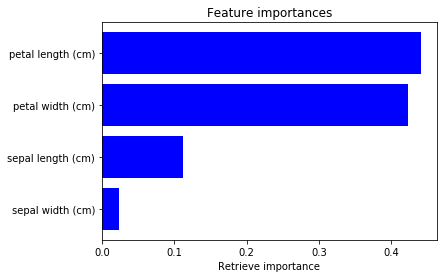

In [110]:
features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Retrieve importance')
plt.show()

# 부스팅

In [206]:
from numpy import *

def loadSimpData():
    datMat = matrix([[1.0,2.1], [2.0,1.1],[1.3,1.0],[1.0,1.0],[2.0,1.0]])
    classLabels = [1.0,1.0,-1.0,-1.0,1.0]
    return datMat, classLabels


In [207]:
datMat, classLabels = loadSimpData()

In [211]:
datMat # 속성 두 개


matrix([[1. , 2.1],
        [2. , 1.1],
        [1.3, 1. ],
        [1. , 1. ],
        [2. , 1. ]])

In [114]:
#for i in range(len(classLabels)):
#    if calssLabels[i]=1.0:
#        xcord1.append(datMat[i,0]), ycord1.append(datMat(i,1))

In [133]:
# treshVal: 경계선이 되는 값 / threshineq: 작다, 같다 표시


def stumpClassify(dataMatrix,dimen,threshVal, threshIneq): 
    retArray = ones((shape(dataMatrix)[0],1)) # 5,1
    if threshIneq == 'lt': # 작거나 같은 놈은 -1, 큰 놈은 1로 분류
        retArray[dataMatrix[:,dimen]<= threshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen]> threshVal] = 1.0
    return retArray

In [156]:
def buildStump(dataArr,classLabels,D):
    dataMatrix = mat(dataArr); labelMat = mat(classLabels).T
    m,n = shape(dataMatrix #행,열  
    numSteps = 10.0; bestStump={}; bestClasEst = mat(zeros((m,1)))
    minError = inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max();
        stepSize = (rangeMax-rangeMin)/numSteps # 경계값 변하는 값 단위?
        for j in range(-1,int(numSteps)+1):
            for inequal in ['lt','gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr = mat(ones((m,1)))
                errArr[predictedVals == labelMat] = 0
                weightedError = D.T*errArr
                print("split: dim {}, thresh {}, thresh ineqal: {}, the weightedError {}".format(i,threshVal,inequal,weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [157]:
D = mat(ones((5,1))/5) # 가중치는 0.2로 초기값 설정
buildStump(datMat, classLabels, D)

split: dim 0, thresh 0.9, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 0.9, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.0, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.0, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.1, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.1, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.2, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.2, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.3, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.3, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.4, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.4, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.5, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.5, thresh ineqal: gt, the weightedError [[0.4]]
split:

({'dim': 0, 'thresh': 1.3, 'ineq': 'lt'}, matrix([[0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

In [174]:
def adaBoostTrainDS(dataArr, classLabels, numit=40):
    weakClassArr = []
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m)
    aggClassEst = mat(zeros((m,1)))
    for i in range(numit):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)
        print("D {}".format(D.T))
        
        alpha = float(0.5*log((1.0-error)/max(error,1e-16)))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)
        print("classEst {}".format(classEst.T))
        
        expon = multiply(-1*alpha*mat(classLabels).T,classEst)
        D = multiply(D,exp(expon))
        D = D/D.sum()
        aggClassEst += alpha*classEst
        print("aggClassEst {}".format(aggClassEst.T))
        
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T, ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total error {}".format(errorRate))
        
        if errorRate == 0.0: break
    return weakClassArr

In [175]:
adaBoostTrainDS(datMat, classLabels, 9)

split: dim 0, thresh 0.9, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 0.9, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.0, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.0, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.1, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.1, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.2, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.2, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.3, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.3, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.4, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.4, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.5, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.5, thresh ineqal: gt, the weightedError [[0.4]]
split:

[{'dim': 0, 'thresh': 1.3, 'ineq': 'lt', 'alpha': 0.6931471805599453},
 {'dim': 1, 'thresh': 1.0, 'ineq': 'lt', 'alpha': 0.9729550745276565},
 {'dim': 0, 'thresh': 0.9, 'ineq': 'lt', 'alpha': 0.8958797346140273}]

In [183]:
def adaClassify(datToClass, classifierArr):
    dataMatrix = mat(datToClass) 
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix,classifierArr[i]['dim'], classifierArr[i]['thresh'],classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)


In [184]:
classifierArr = adaBoostTrainDS(datMat, classLabels, 30)


split: dim 0, thresh 0.9, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 0.9, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.0, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.0, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.1, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.1, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.2, thresh ineqal: lt, the weightedError [[0.4]]
split: dim 0, thresh 1.2, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.3, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.3, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.4, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.4, thresh ineqal: gt, the weightedError [[0.4]]
split: dim 0, thresh 1.5, thresh ineqal: lt, the weightedError [[0.2]]
split: dim 0, thresh 1.5, thresh ineqal: gt, the weightedError [[0.4]]
split:

In [185]:
adaClassify([0,0],classifierArr)

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

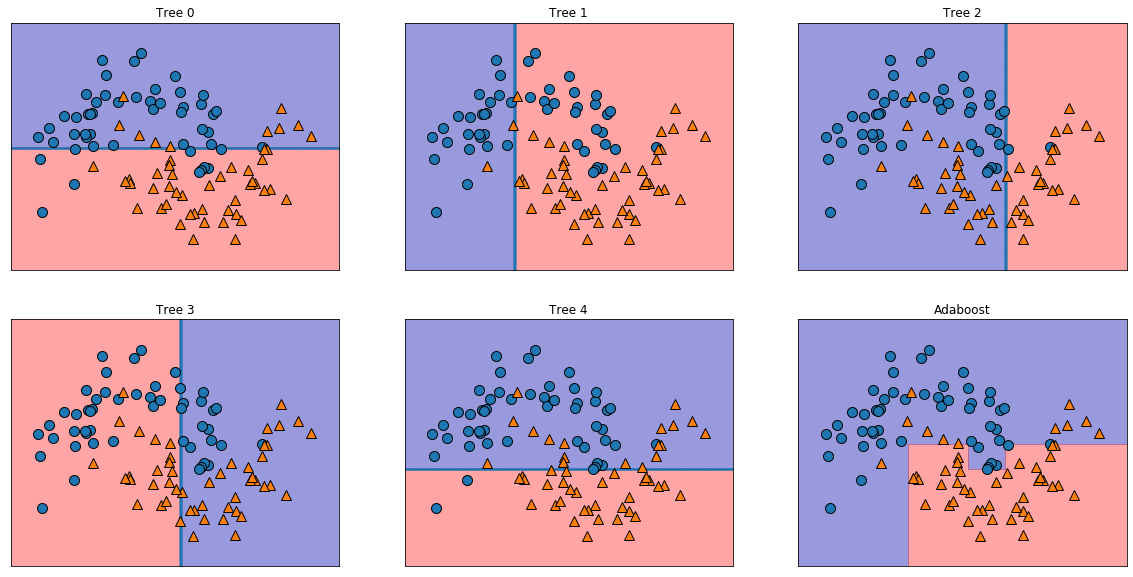

In [190]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state = 42)
ada.fit(X_train,y_train)

fig, axes = plt.subplots(2,3, figsize = (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X,y, tree, ax=ax)
mglearn.plots.plot_2d_separator(ada,X,fill=True, ax=axes[-1,-1],alpha=0.4)
axes[-1,-1].set_title("Adaboost")
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()